# 1.) Importing all Libraries & Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import xgboost as xgb
import numpy as np



from matplotlib.pyplot import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold

# 2.) Loading The Dataset

In [ ]:
# Load the dataset into a pandas DataFrame
#df = pd.read_csv("dataset1.csv")
df = pd.read_csv("dataset1.csv", low_memory=False)


In [ ]:
df.shape

(171843, 22)

In [ ]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 171843 rows and 22 columns


In [ ]:
df.sample(5)

,Timestamp,datapath.id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
85697,1733142706,2,10.0.0.54723610.0.0.650511,10.0.0.5,47236,10.0.0.6,5051,1,0,8,...,20,100,0,9,882,1.125000,9.40E-09,110.250000,9.22E-07,0
100472,1733146507,6,10.0.0.174019010.0.0.250501,10.0.0.17,40190,10.0.0.2,5050,1,0,8,...,20,100,0,8,760,1.333333,1.05E-08,126.666667,1.00E-06,0
25441,1733611323,6,10.0.0.16010.0.0.1601,10.0.0.16,0,10.0.0.16,0,1,0,8,...,20,100,0,37776,6119712,994.105263,0.000108865,161045.052600,0.017636058,1
120222,1733129682,2,10.0.0.23683010.0.0.1150501,10.0.0.2,36830,10.0.0.11,5050,1,0,8,...,20,100,0,21,2058,1.050000,3.30E-08,102.900000,3.23E-06,0
133071,1733405780,3,10.0.0.162010.0.0.324916,10.0.0.16,20,10.0.0.3,2491,6,-1,0,...,20,100,0,1,54,1.000000,1.41E-09,54.000000,7.63E-08,2


<Figure size 2000x2000 with 0 Axes>

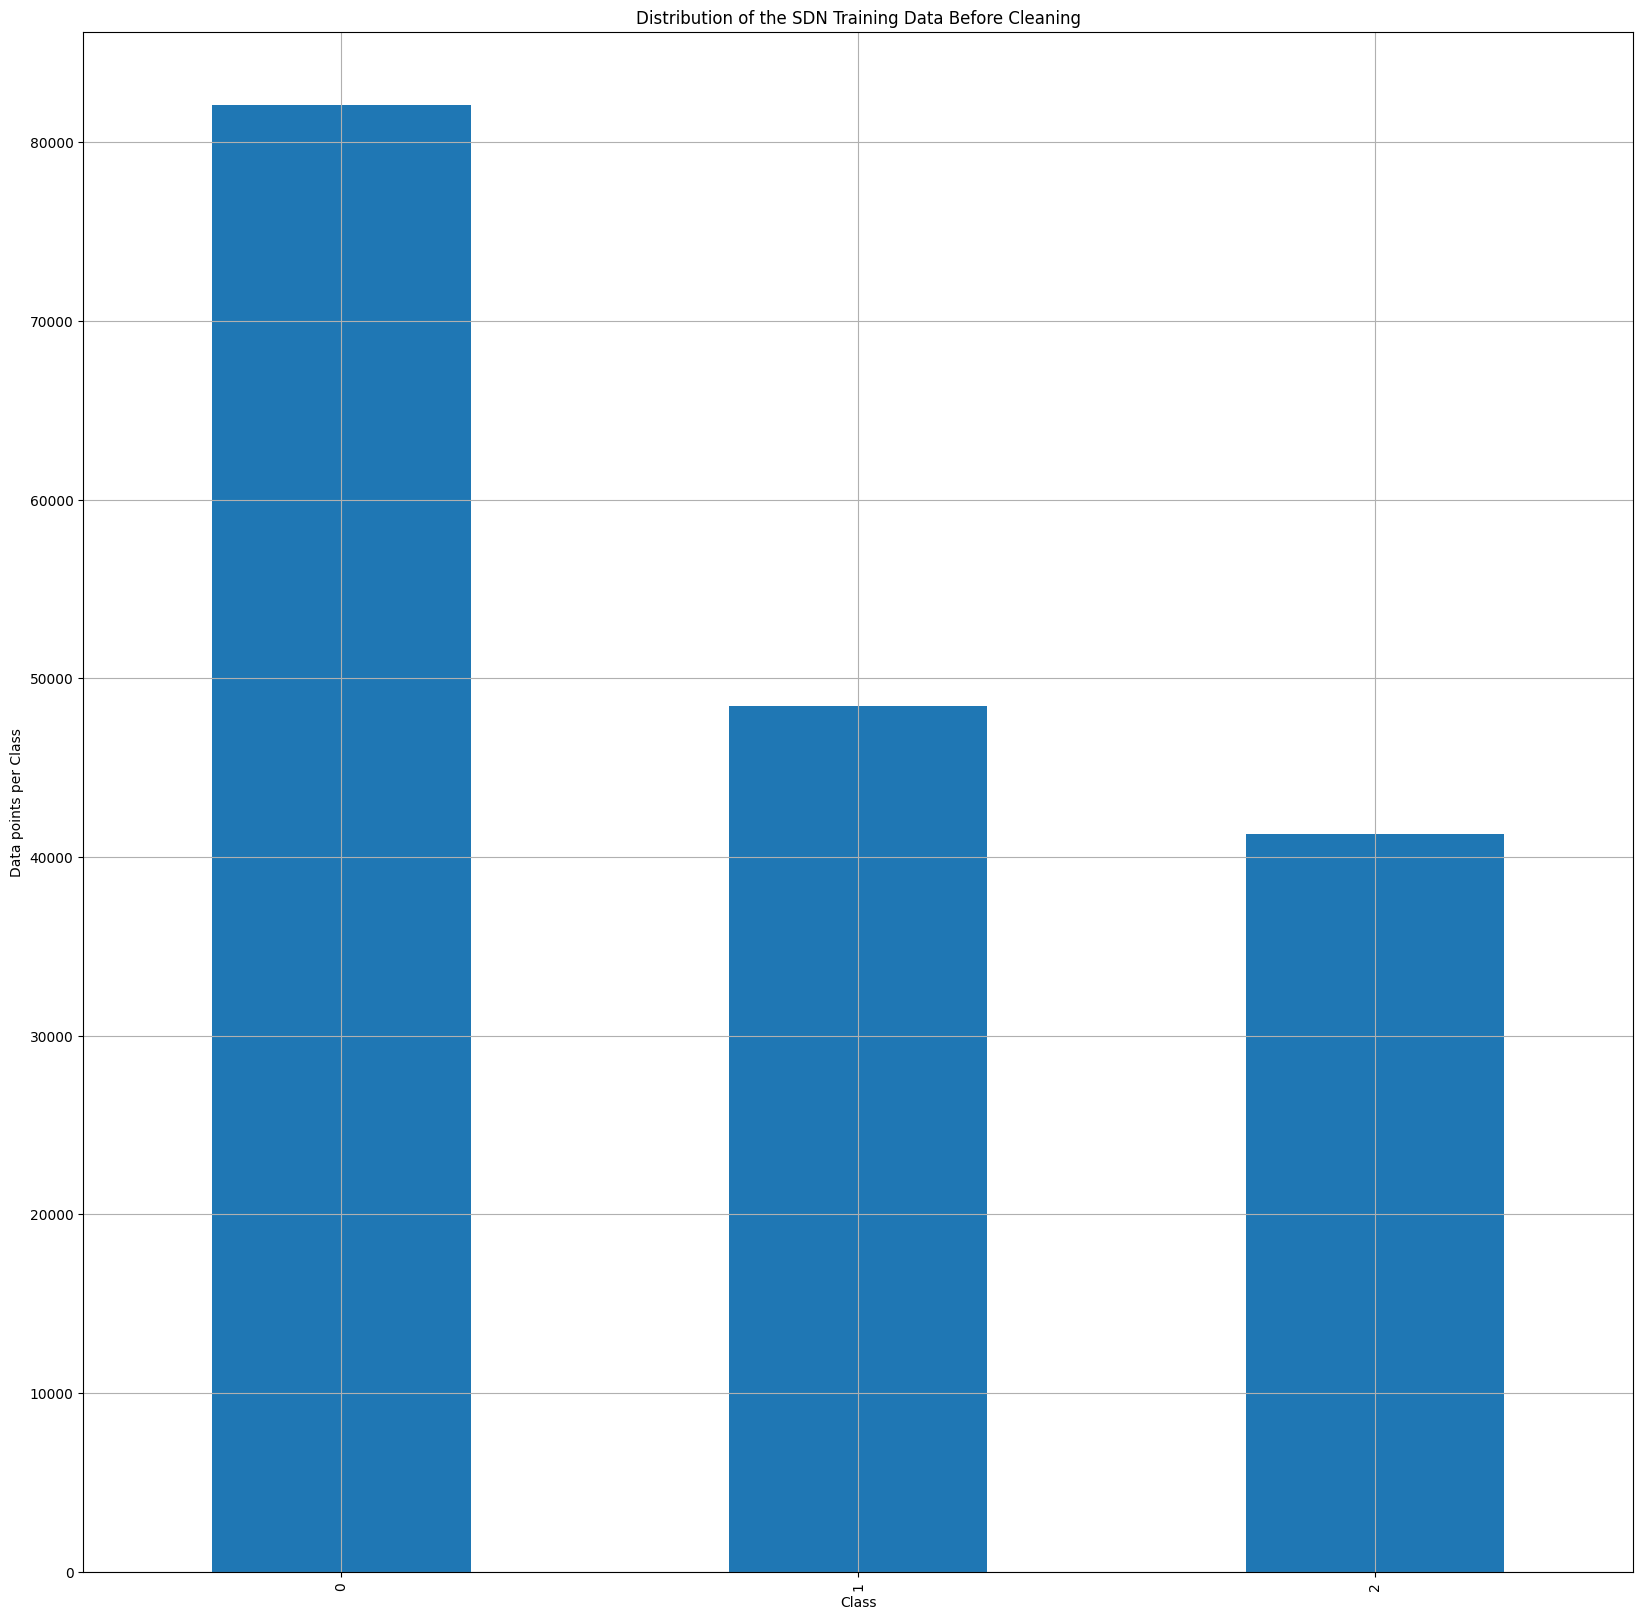

In [ ]:


plt.figure(figsize=(20,20))

fig, ax = plt.subplots(figsize=(20,20))

class_distribution = df['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of the SDN Training Data Before Cleaning')
plt.grid()
plt.show()

#fig.savefig('Data_Distribution.pdf')

In [ ]:
# Before Cleaning Data set for Duplicates
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class 0 : 82077 ( 47.763 %)
Number of data points in class 1 : 48479 ( 28.211 %)
Number of data points in class 2 : 41287 ( 24.026 %)


##### The dataset contains 82,077 data points labeled as Normal (47.763%), 48,479 as DDoS (28.211%), and 41,287 as Scanning Attack (24.026%).

# 3.) Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171843 entries, 0 to 171842
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Timestamp                 171843 non-null  int64  
 1   datapath.id               171843 non-null  int64  
 2   flow_id                   171843 non-null  object 
 3   ip_src                    171843 non-null  object 
 4   tp_src                    171843 non-null  int64  
 5   ip_dst                    171843 non-null  object 
 6   tp_dst                    171843 non-null  int64  
 7   ip_proto                  171843 non-null  int64  
 8   icmp_code                 171843 non-null  int64  
 9   icmp_type                 171843 non-null  int64  
 10  duration_sec              171843 non-null  int64  
 11  duration_nsec             171843 non-null  int64  
 12  idle_timeout              171843 non-null  int64  
 13  hard_timeout              171843 non-null  i

In [ ]:
df.isnull().sum()

,0
Timestamp,0
datapath.id,0
flow_id,0
ip_src,0
tp_src,0
ip_dst,0
tp_dst,0
ip_proto,0
icmp_code,0
icmp_type,0


In [ ]:
# Check the number of duplicates before dropping
duplicates_before = df[df.duplicated()]
print("Number of duplicates before dropping:", duplicates_before.shape[0])

Number of duplicates before dropping: 2031


In [ ]:
# Drop duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 169812 rows and 22 columns


<Figure size 2000x2000 with 0 Axes>

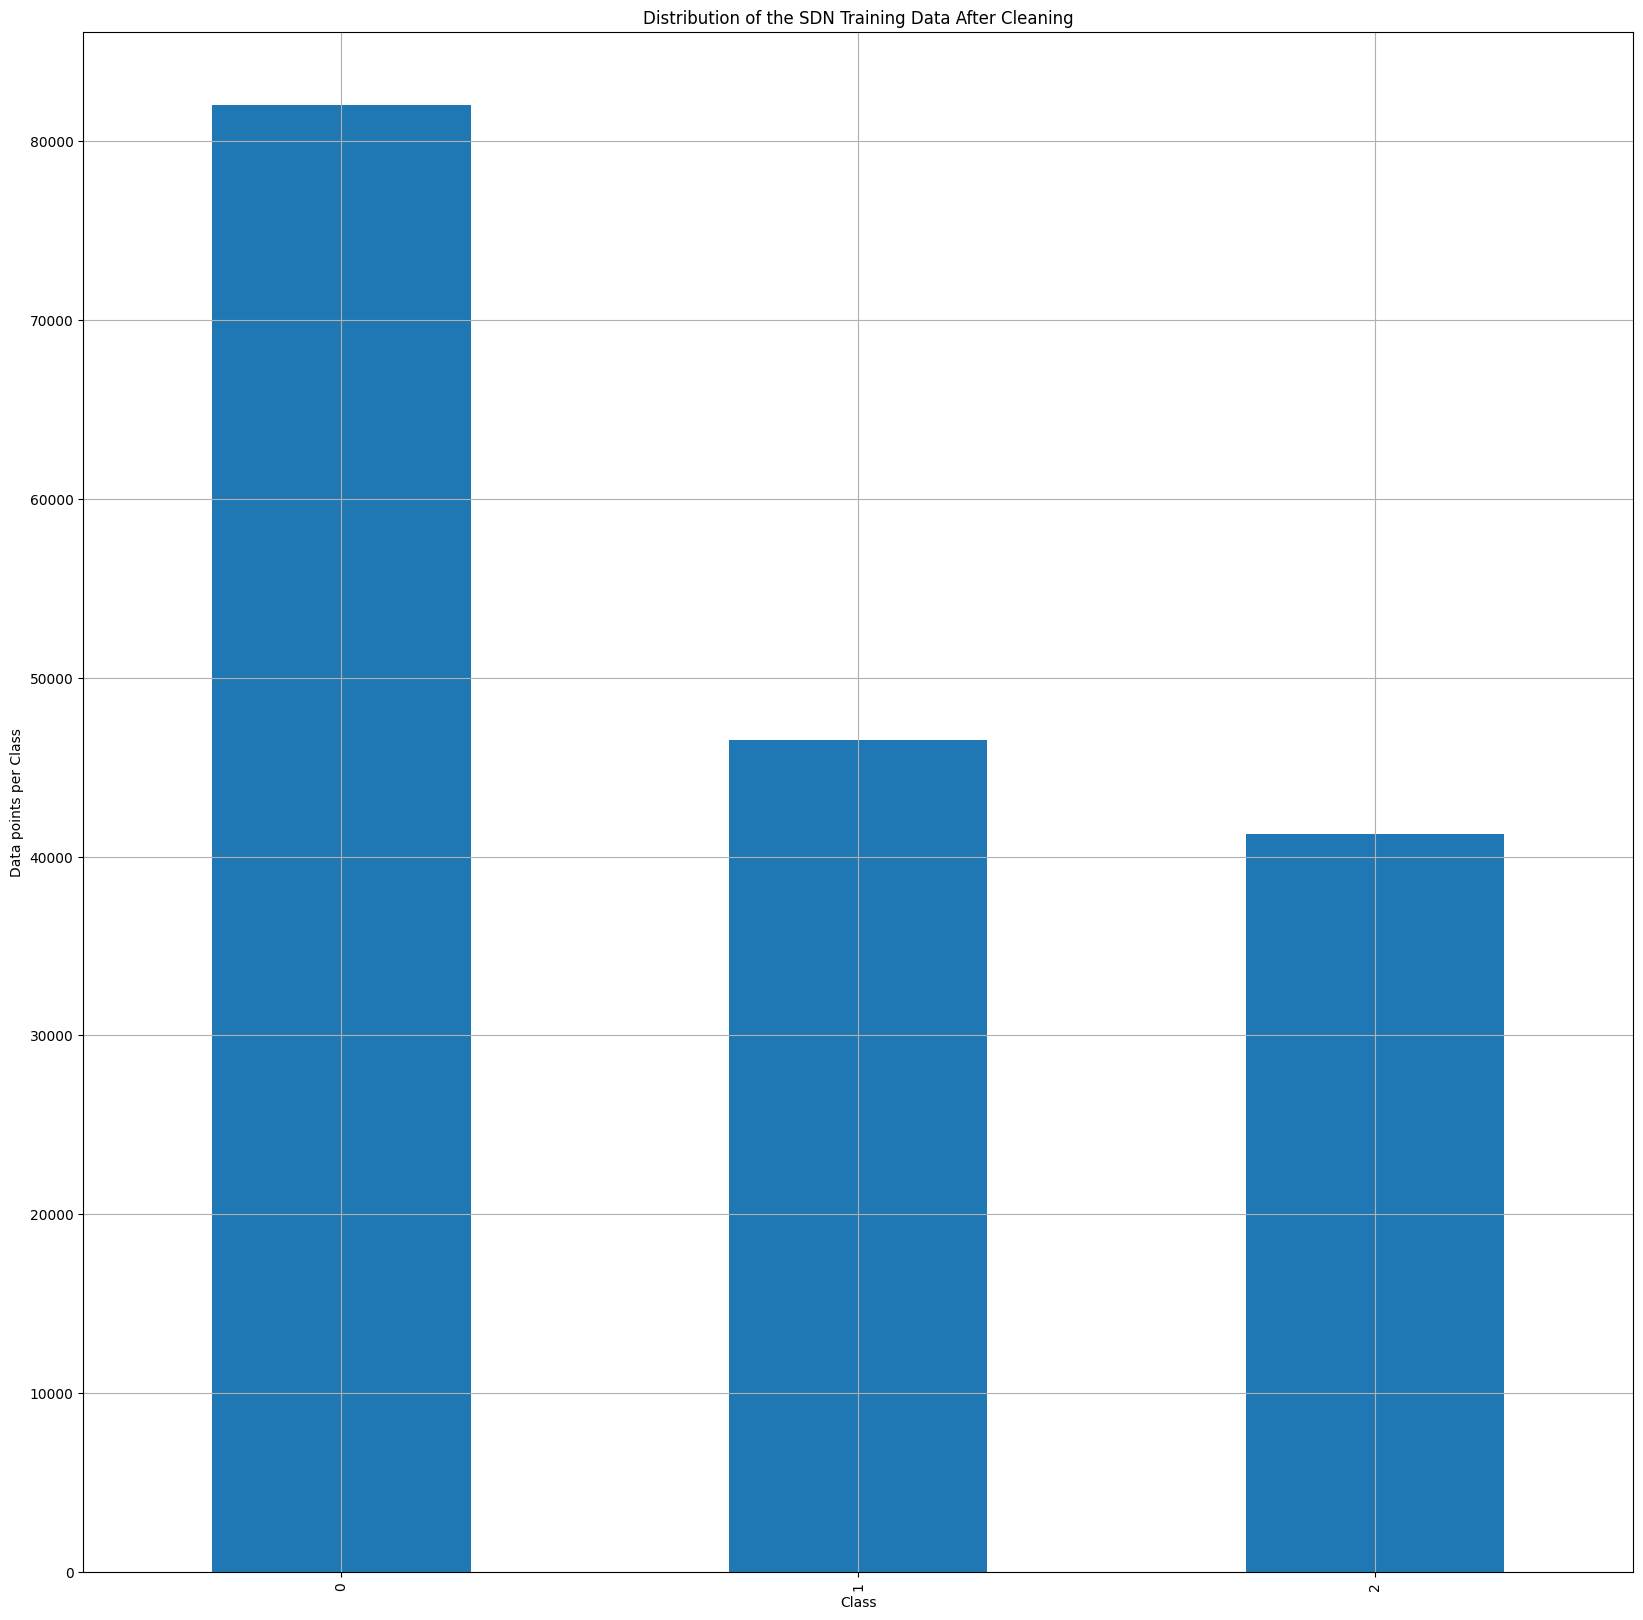

In [ ]:

plt.figure(figsize=(20,20))

fig, ax = plt.subplots(figsize=(20,20))

class_distribution = df['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of the SDN Training Data After Cleaning')
plt.grid()
plt.show()

#fig.savefig('Data_Distribution_After_Cleaning.pdf')

In [ ]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class 0 : 82023 ( 48.302 %)
Number of data points in class 1 : 46502 ( 27.384 %)
Number of data points in class 2 : 41287 ( 24.313 %)


##### After cleaning, the dataset contains 82,023 data points labeled as Normal (48.302%), 46,502 as DDoS (27.384%), and 41,287 as Scanning Attack (24.313%).

In [ ]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

###### The code analyzes (`df`) by printing the number of rows, and for each column, it either shows the unique values and their percentages (if there are 100 or fewer unique values) or the count of unique values along with the percentage of unique values relative to the total rows (if there are more than 100 unique values).

In [ ]:
analyze(df)


169812 rows
** Timestamp:15053 (8%)
** datapath.id:[2:24.49%,3:20.11%,1:18.56%,4:17.18%,5:13.14%,6:6.52%]
** flow_id:13169 (7%)
** ip_src:[10.0.0.1:16.77%,10.0.0.3:13.66%,10.0.0.17:7.99%,10.0.0.4:7.78%,10.0.0.18:6.88%,10.0.0.10:6.16%,10.0.0.8:5.92%,10.0.0.2:4.52%,10.0.0.14:4.28%,10.0.0.16:4.25%,10.0.0.11:3.03%,10.0.0.12:2.98%,10.0.0.9:2.95%,10.0.0.7:2.8%,10.0.0.15:2.62%,10.0.0.13:2.58%,10.0.0.5:2.44%,10.0.0.6:2.37%,88.70.102.105:0.01%,67.154.68.94:0.01%,224.230.51.111:0.0%]
** tp_src:2952 (1%)
** ip_dst:[10.0.0.1:18.48%,10.0.0.3:14.34%,10.0.0.4:8.49%,10.0.0.17:7.4%,10.0.0.18:7.22%,10.0.0.2:5.1%,10.0.0.10:4.55%,10.0.0.16:4.4%,10.0.0.14:4.16%,10.0.0.8:3.82%,10.0.0.12:3.46%,10.0.0.9:3.01%,10.0.0.11:3.01%,10.0.0.7:2.71%,10.0.0.15:2.57%,10.0.0.13:2.49%,10.0.0.5:2.44%,10.0.0.6:2.34%]
** tp_dst:2889 (1%)
** ip_proto:[1:49.39%,6:43.67%,17:6.95%]
** icmp_code:[0:59.3%,-1:40.7%]
** icmp_type:[0:66.94%,8:33.06%]
** duration_sec:101 (0%)
** duration_nsec:1000 (0%)
** idle_timeout:[20:100.0%]
** h

### Feature categorization

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 17 and they are : 
 ['Timestamp', 'datapath.id', 'tp_src', 'tp_dst', 'ip_proto', 'icmp_code', 'icmp_type', 'duration_sec', 'duration_nsec', 'idle_timeout', 'hard_timeout', 'flags', 'packet_count', 'byte_count', 'packet_count_per_second', 'byte_count_per_second', 'label']


In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 5 and they are : 
 ['flow_id', 'ip_src', 'ip_dst', 'packet_count_per_nsecond', 'byte_count_per_nsecond']


In [ ]:
#discrete numerical features
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 7 and they are : 
 ['datapath.id', 'ip_proto', 'icmp_code', 'icmp_type', 'idle_timeout', 'hard_timeout', 'flags']


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 9 and they are : 
 ['Timestamp', 'tp_src', 'tp_dst', 'duration_sec', 'duration_nsec', 'packet_count', 'byte_count', 'packet_count_per_second', 'byte_count_per_second']


In [ ]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['flow_id', 'ip_src', 'ip_dst', 'packet_count_per_nsecond', 'byte_count_per_nsecond']


##### We identifiy and categorize features in the dataset into numerical, categorical, discrete, and continuous types, and prints their counts and names.

In [ ]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

Timestamp                  15053
datapath.id                    6
tp_src                      2952
tp_dst                      2889
ip_proto                       3
icmp_code                      2
icmp_type                      2
duration_sec                 101
duration_nsec               1000
idle_timeout                   1
hard_timeout                   1
flags                          1
packet_count               28283
byte_count                 28634
packet_count_per_second    36954
byte_count_per_second      28622
label                          3
dtype: int64

##### We inspect irrelevant or unnecessary columns from the dataset to focus on features that are more meaningful for modeling.

In [ ]:
df = df.drop(['Timestamp'], axis=1)
df = df.drop(['flow_id'], axis=1)
df = df.drop(['idle_timeout'], axis=1)
df = df.drop(['hard_timeout'], axis=1)
df = df.drop(['flags'], axis=1)
df = df.drop(['icmp_code'], axis=1)
df = df.drop(['packet_count_per_nsecond'], axis=1)
df = df.drop(['byte_count_per_nsecond'], axis=1)



##### Dropping columns that won't affect modeling

In [ ]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 169812 rows and 14 columns


# 4.) Data Preprocessing

In [ ]:
df['ip_src'].unique()

array(['10.0.0.11', '10.0.0.4', '10.0.0.8', '10.0.0.3', '10.0.0.2',
       '10.0.0.1', '10.0.0.16', '10.0.0.9', '10.0.0.12', '88.70.102.105',
       '10.0.0.10', '10.0.0.18', '10.0.0.6', '10.0.0.13', '10.0.0.14',
       '10.0.0.5', '10.0.0.17', '10.0.0.7', '224.230.51.111', '10.0.0.15',
       '67.154.68.94'], dtype=object)

In [ ]:
df["ip_src"].value_counts()

ip_src
10.0.0.1          28483
10.0.0.3          23195
10.0.0.17         13576
10.0.0.4          13219
10.0.0.18         11680
10.0.0.10         10454
10.0.0.8          10050
10.0.0.2           7671
10.0.0.14          7265
10.0.0.16          7212
10.0.0.11          5149
10.0.0.12          5067
10.0.0.9           5012
10.0.0.7           4749
10.0.0.15          4457
10.0.0.13          4377
10.0.0.5           4143
10.0.0.6           4018
88.70.102.105        17
67.154.68.94         17
224.230.51.111        1
Name: count, dtype: int64

In [ ]:
df['ip_dst'].unique()

array(['10.0.0.11', '10.0.0.1', '10.0.0.16', '10.0.0.4', '10.0.0.3',
       '10.0.0.9', '10.0.0.12', '10.0.0.2', '10.0.0.8', '10.0.0.10',
       '10.0.0.18', '10.0.0.6', '10.0.0.14', '10.0.0.13', '10.0.0.17',
       '10.0.0.7', '10.0.0.15', '10.0.0.5'], dtype=object)

In [ ]:
df["ip_dst"].value_counts()

ip_dst
10.0.0.1     31380
10.0.0.3     24355
10.0.0.4     14423
10.0.0.17    12561
10.0.0.18    12256
10.0.0.2      8664
10.0.0.10     7719
10.0.0.16     7473
10.0.0.14     7072
10.0.0.8      6487
10.0.0.12     5874
10.0.0.9      5113
10.0.0.11     5111
10.0.0.7      4606
10.0.0.15     4365
10.0.0.13     4236
10.0.0.5      4151
10.0.0.6      3966
Name: count, dtype: int64

In [ ]:
#df['ip_dst'] = [int(i.split('.')[3]) for i in df['ip_dst']]
#df['ip_src'] = [int(i.split('.')[3]) for i in df['ip_src']]

##### Since the IPs we are using are in the form 10.10.10.x, we are taking the last digits of the IPs (might use)

### `Ali AI Prompt One`

In [ ]:
# Function to convert IP addresses to integers

def ip_to_int(ip):
    return int(ipaddress.IPv4Address(ip))

# Apply the conversion to the DataFrame columns
df['ip_src'] = df['ip_src'].apply(ip_to_int)
df['ip_dst'] = df['ip_dst'].apply(ip_to_int)



##### We convert IP addresses in the (`ip_src`) and (`ip_dst`) columns of the DataFrame into their integer representations for easier processing and analysis

In [ ]:
# Extract categorical variables
cat_vars = ['ip_proto', 'icmp_type']

# Perform one-hot encoding
encoder = OneHotEncoder()
encoded_vars = encoder.fit_transform(df[cat_vars])

# Replace categorical variables with one-hot encoded variables
df.drop(cat_vars, axis=1, inplace=True)
encoded_df = pd.DataFrame(encoded_vars.toarray(), columns=encoder.get_feature_names_out(cat_vars))
df = pd.concat([df, encoded_df], axis=1)

# Checking the shape of the DataFrame after encoding
print("This DataFrame has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))



This DataFrame has 171843 rows and 17 columns after encoding


##### One-hot encoding is applied to the categorical variables (`ip_proto`) and (`icmp_type`), where we replace the original columns with their encoded versions, and update the DataFrame to facilitate machine learning algorithms that require numerical input.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171843 entries, 0 to 72383
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   datapath.id              169812 non-null  float64
 1   ip_src                   169812 non-null  float64
 2   tp_src                   169812 non-null  float64
 3   ip_dst                   169812 non-null  float64
 4   tp_dst                   169812 non-null  float64
 5   duration_sec             169812 non-null  float64
 6   duration_nsec            169812 non-null  float64
 7   packet_count             169812 non-null  float64
 8   byte_count               169812 non-null  float64
 9   packet_count_per_second  169812 non-null  float64
 10  byte_count_per_second    169812 non-null  float64
 11  label                    169812 non-null  float64
 12  ip_proto_1               169812 non-null  float64
 13  ip_proto_6               169812 non-null  float64
 14  ip_proto_1

##### Checking that all columns in the DataFrame are numerical and can be read by machine learning

In [ ]:
# Before splitting: checking for missing values in the target column
print("Missing labels in the full dataset:", df['label'].isna().sum())

Missing labels in the full dataset: 2031


In [ ]:
df.isnull().sum()

,0
datapath.id,2031
ip_src,2031
tp_src,2031
ip_dst,2031
tp_dst,2031
duration_sec,2031
duration_nsec,2031
packet_count,2031
byte_count,2031
packet_count_per_second,2031


In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

,0
datapath.id,0
ip_src,0
tp_src,0
ip_dst,0
tp_dst,0
duration_sec,0
duration_nsec,0
packet_count,0
byte_count,0
packet_count_per_second,0


# 5.) Model Building

In [ ]:
#separating input and output attributes
X = df.drop(['label'], axis=1)
y = df['label']

##### The array y now contains the target labels or classes associated with the dataset

##### Min-Max scaling to the feature set X, transforming the values so that they are scaled

In [ ]:
ms = MinMaxScaler()
X_final = ms.fit_transform(X)

''' Migt use
# Columns to scale
columns_to_scale = [
    'packet_count',
    'byte_count',
    'packet_count_per_second',
    'byte_count_per_second'
]

# Columns to exclude from scaling
columns_to_exclude = [
    'datapath_id',
    'ip_src',
    'tp_src',
    'ip_dst',
    'tp_dst',
    'flow_duration_sec',
    'flow_duration_nsec',
    'idle_timeout',
    'hard_timeout',
    'flags',
    'packet_count_per_nsecond',
    'byte_count_per_nsecond',
    'ip_proto_1',
    'ip_proto_6',
    'ip_proto_17',
    'icmp_code_-1',
    'icmp_code_0',
    'icmp_type_-1',
    'icmp_type_0',
    'icmp_type_8'
]

# 1. Split into two parts: one to scale, one to keep unchanged
X_to_scale = X[columns_to_scale]
X_to_keep = X[columns_to_exclude]

# 2. Apply MinMaxScaler to the part of the dataset you want to scale
ms = MinMaxScaler()
X_scaled = ms.fit_transform(X_to_scale)

# 3. Convert the scaled data back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=columns_to_scale)

# 4. Concatenate the scaled data with the untouched data
X_final = pd.concat([X_to_keep, X_scaled_df], axis=1)
'''

" Migt use\n# Columns to scale\ncolumns_to_scale = [\n    'packet_count',\n    'byte_count',\n    'packet_count_per_second',\n    'byte_count_per_second'\n]\n\n# Columns to exclude from scaling\ncolumns_to_exclude = [\n    'datapath_id',\n    'ip_src',\n    'tp_src',\n    'ip_dst',\n    'tp_dst',\n    'flow_duration_sec',\n    'flow_duration_nsec',\n    'idle_timeout',\n    'hard_timeout',\n    'flags',\n    'packet_count_per_nsecond',\n    'byte_count_per_nsecond',\n    'ip_proto_1',\n    'ip_proto_6',\n    'ip_proto_17',\n    'icmp_code_-1',\n    'icmp_code_0',\n    'icmp_type_-1',\n    'icmp_type_0',\n    'icmp_type_8'\n]\n\n# 1. Split into two parts: one to scale, one to keep unchanged\nX_to_scale = X[columns_to_scale]\nX_to_keep = X[columns_to_exclude]\n\n# 2. Apply MinMaxScaler to the part of the dataset you want to scale\nms = MinMaxScaler()\nX_scaled = ms.fit_transform(X_to_scale)\n\n# 3. Convert the scaled data back into a DataFrame\nX_scaled_df = pd.DataFrame(X_scaled, column

## a.) Split data into training and testing sets.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=2)

## b.) Creating instances of three different Naive Bayes classifiers from scikit-learn and two other Models:

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
xgb = XGBClassifier(n_estimators=50,random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

##### The next set of codes provided fits a Gaussian Naive Bayes classifier (gnb), mnb, bnb, xbg and rfc on the training data, makes predictions on the testing data.

### `Ali AI Prompt Two` using average on the evaluation metrics

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Print precision
precision = precision_score(y_test, y_pred1, average='macro')
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred1, average='macro')
print("Recall:", recall)

# Print F1 score
f1 = f1_score(y_test, y_pred1, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[13990  1488   933]
 [  250  9083     0]
 [    0     0  7813]]
Accuracy: 0.920404088565724
Precision: 0.9116680062232856
Recall: 0.9418967753945111
F1 Score: 0.9230648471946986


#### For Gaussian Naive Bayes classifier; The model achieves high performance with an accuracy of 92.04%, precision of 91.17%, recall of 94.19%, and an F1 score of 92.31%, with the confusion matrix indicating that 13,990 instances of Normal (class 0) were correctly classified, 1,488 misclassified as DDoS (class 1), and 933 as Scanning Attack (class 2); 9,083 instances of DDoS (class 1) were correctly classified, with 250 misclassified as Normal and none as Scanning Attack; and all 7,813 instances of Scanning Attack (class 2) were correctly classified.

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Print precision
precision = precision_score(y_test, y_pred2, average='macro')
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred2, average='macro')
print("Recall:", recall)

# Print F1 score
f1 = f1_score(y_test, y_pred2, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[13994  1307  1110]
 [  624  8564   145]
 [    0     0  7813]]
Accuracy: 0.9050570670798939
Precision: 0.895502024329438
Recall: 0.9234416454138837
F1 Score: 0.9065161641228201


#### For MultinomialNB The model achieves a performance with an accuracy of 90.51%, precision of 89.55%, recall of 92.34%, and an F1 score of 90.65%, with the confusion matrix showing that 13,994 instances of Normal (class 0) were correctly classified, 1,307 misclassified as DDoS (class 1), and 1,110 as Scanning Attack (class 2); 8,564 instances of DDoS (class 1) were correctly classified, with 624 misclassified as Normal and 145 as Scanning Attack; and all 7,813 instances of Scanning Attack (class 2) were correctly classified.

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Print precision
precision = precision_score(y_test, y_pred3, average='macro')
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred3, average='macro')
print("Recall:", recall)

# Print F1 score
f1 = f1_score(y_test, y_pred3, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[14297  1487   627]
 [  747  8586     0]
 [    0     0  7813]]
Accuracy: 0.9147420806389129
Precision: 0.9094780654768226
Recall: 0.9303817963901837
F1 Score: 0.9184493794162844


#### For BernoulliNB; The model achieves a performance with an accuracy of 91.47%, meaning 91.47% of the predictions were correct across all classes; precision of 90.95%, indicating that 90.95% of the instances predicted as a particular class (Normal, DDoS, or Scanning Attack) were correct; recall of 93.04%, showing that 93.04% of the actual instances of a particular class were correctly identified by the model; and an F1 score of 91.84%, which balances precision and recall, reflecting the model's overall performance in both correctly identifying instances and minimizing misclassifications, with the confusion matrix showing that 14,297 instances of Normal (class 0) were correctly classified, 1,487 misclassified as DDoS (class 1), and 627 as Scanning Attack (class 2); 8,586 instances of DDoS (class 1) were correctly classified, with 747 misclassified as Normal and none as Scanning Attack; and all 7,813 instances of Scanning Attack (class 2) were correctly classified.

In [ ]:
xgb.fit(X_train, y_train)
y_pred4 = xgb.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

# Print precision
precision = precision_score(y_test, y_pred4, average='macro')
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred4, average='macro')
print("Recall:", recall)

# Print F1 score
f1 = f1_score(y_test, y_pred4, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[16411     0     0]
 [    0  9333     0]
 [    0     0  7813]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
rfc.fit(X_train, y_train)
y_pred5 = rfc.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred5))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)

# Print precision
precision = precision_score(y_test, y_pred5, average='macro')
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred5, average='macro')
print("Recall:", recall)

# Print F1 score
f1 = f1_score(y_test, y_pred5, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[16411     0     0]
 [    0  9333     0]
 [    0     0  7813]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### For XGBClassifier and RandomForestClassifier; The models achieved perfect performance with an accuracy, precision, recall, and F1 score of 1.0, correctly classifying all 16,411 instances of Normal (class 0), 9,333 instances of DDoS (class 1), and 7,813 instances of Scanning Attack (class 2) with no misclassifications.

### c.) Initialized instances of several machine learning classifiers from scikit-learn and other libraries

In [ ]:
# Instantiate classifiers
#svc_sigmoid = SVC(kernel='sigmoid', gamma=1.0)
#svc_linear = SVC(kernel='linear')
mnb = MultinomialNB()
gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors=3)
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

# Create the dictionary of classifiers
clfs = {
    #'SVC_Sigmoid': svc_sigmoid,
    #'SVC_Linear': svc_linear,
    'GB': gnb,
    'MB': mnb,
    'KN': knc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

### Created a dictionary named clfs with the classifiers and their corresponding keys. This can be useful for easily referencing and comparing multiple classifiers in our analysis. With this setup, we can easily iterate over the dictionary to train and evaluate each classifier, compare their performances, and choose the model that best suits our dataset.

### 1.) Training

In [ ]:
# Define lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
error_rates = []

# Loop over classifiers
for name, clf in clfs.items():
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Predict labels on the training set
    y_train_pred = clf.predict(X_train)

    # Calculate metrics
    accuracy = accuracy_score(y_train, y_train_pred)

    # Precision, recall, and f1 score with average='macro'  for multiclass
    precision = precision_score(y_train, y_train_pred, average='macro')
    recall = recall_score(y_train, y_train_pred, average='macro')
    f1 = f1_score(y_train, y_train_pred, average='macro')

    # Confusion matrix
    confusion = confusion_matrix(y_train, y_train_pred)


    # Calculate error rate
    error_rate = np.sum(y_train_pred != y_train) / len(y_train)


    # Print metrics
    print("For", name)
    # Print confusion matrix
    print("Confusion Matrix:\n", confusion)
    print("Training Accuracy:", accuracy)
    print("Training Precision:", precision)
    print("Training Recall:", recall)
    print("Training F1 Score:", f1)
    print("Error Rate:", error_rate)
    print()

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    error_rates.append(error_rate)

For GB
Confusion Matrix:
 [[55836  5956  3820]
 [ 1098 36071     0]
 [    0     0 31443]]
Training Accuracy: 0.9189861723685779
Training Precision: 0.9102224163882257
Training Recall: 0.9404873730028847
Training F1 Score: 0.9216432018669615
Error Rate: 0.0810138276314221

For MB
Confusion Matrix:
 [[55908  5210  4494]
 [ 2446 34100   623]
 [    0     0 31443]]
Training Accuracy: 0.9048381809512457
Training Precision: 0.8951951549240128
Training Recall: 0.9231771394096814
Training F1 Score: 0.9061635454614017
Error Rate: 0.09516181904875431

For KN
Confusion Matrix:
 [[63696  1566   350]
 [  428 36655    86]
 [    1     3 31439]]
Training Accuracy: 0.9818661342233878
Training Precision: 0.9795280002432508
Training Recall: 0.9856140273953202
Training F1 Score: 0.9824491202615432
Error Rate: 0.018133865776612232

For NB
Confusion Matrix:
 [[57057  5964  2591]
 [ 2941 34228     0]
 [    0     0 31443]]
Training Accuracy: 0.914352127786387
Training Precision: 0.9088214026453786
Training Rec

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For LR
Confusion Matrix:
 [[62633  1871  1108]
 [ 1155 35740   274]
 [    2     0 31441]]
Training Accuracy: 0.9671444749076171
Training Precision: 0.9633372180635044
Training Recall: 0.9720290320360053
Training F1 Score: 0.9674575496026471
Error Rate: 0.03285552509238288

For RF
Confusion Matrix:
 [[65612     0     0]
 [    0 37169     0]
 [    0     0 31443]]
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Error Rate: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Confusion Matrix:
 [[60383  5229     0]
 [    0 37169     0]
 [    0     0 31443]]
Training Accuracy: 0.9610427345333175
Training Precision: 0.9588895702627482
Training Recall: 0.9734347375480095
Training F1 Score: 0.96426005111769
Error Rate: 0.03895726546668256

For BgC
Confusion Matrix:
 [[65612     0     0]
 [    0 37169     0]
 [    0     0 31443]]
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Error Rate: 0.0

For ETC
Confusion Matrix:
 [[65612     0     0]
 [    0 37169     0]
 [    0     0 31443]]
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Error Rate: 0.0

For GBDT
Confusion Matrix:
 [[65599    13     0]
 [    2 37167     0]
 [    0     0 31443]]
Training Accuracy: 0.9998882465132912
Training Precision: 0.9998732874367392
Training Recall: 0.9999160190771038
Training F1 Score: 0.9998946436195076
Error Rate: 0.00011175348670878532

For xgb
Confusion Matrix:
 [[65612     0     

In [ ]:
Training_performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Training Accuracy': accuracy_scores,
    'Training Precision': precision_scores,
    'Training Recall': recall_scores,
    'Training F1 Score': f1_scores,
    'Error Rates': error_rates
}).sort_values('Training Recall', ascending=False)
Training_performance_df

,Algorithm,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Error Rates
4,DT,1.000000,1.000000,1.000000,1.000000,0.000000
6,RF,1.000000,1.000000,1.000000,1.000000,0.000000
8,BgC,1.000000,1.000000,1.000000,1.000000,0.000000
9,ETC,1.000000,1.000000,1.000000,1.000000,0.000000
11,xgb,1.000000,1.000000,1.000000,1.000000,0.000000
10,GBDT,0.999888,0.999873,0.999916,0.999895,0.000112
2,KN,0.981866,0.979528,0.985614,0.982449,0.018134
7,AdaBoost,0.961043,0.958890,0.973435,0.964260,0.038957
5,LR,0.967144,0.963337,0.972029,0.967458,0.032856
0,GB,0.918986,0.910222,0.940487,0.921643,0.081014


## `Ali Prompt Five`

In [ ]:
import joblib
for clf_name, clf in clfs.items():
    joblib.dump(clf, f'{clf_name}_model.pkl')  # Save each model
    print(f"{clf_name} model saved successfully.")

GB model saved successfully.
MB model saved successfully.
KN model saved successfully.
NB model saved successfully.
DT model saved successfully.
LR model saved successfully.
RF model saved successfully.
AdaBoost model saved successfully.
BgC model saved successfully.
ETC model saved successfully.
GBDT model saved successfully.
xgb model saved successfully.


In [ ]:

joblib.dump(encoder, 'encoder.pkl')

print(" encoder saved successfully.")

joblib.dump(ms, 'scaler.pkl')

print("scaler saved successfully.")



 encoder saved successfully.
scaler saved successfully.


#### Saving trained models, encoding and scaling using the joblib library to load them on the Controller

##### The train_classifier function a reusable piece of code that simplifies the process of training a classifier, making predictions on test data, and calculating accuracy and precision scores

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Print metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Use macro averaging for multiclass precision, recall, and f1-score
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Calculate confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", confusion)

    # Calculate error rate (same for multiclass)
    error_rate = np.sum(y_pred != y_test) / len(y_test)
    print("Error Rate:", error_rate)

    # Return metrics
    return (
        accuracy_score(y_test, y_pred),
        precision,
        recall,
        f1,
        error_rate,
        confusion_matrix(y_test, y_pred)
    )


In [ ]:
train_classifier(xgb,X_train,y_train,X_test,y_test)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[16411     0     0]
 [    0  9333     0]
 [    0     0  7813]]
Error Rate: 0.0


(1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 array([[16411,     0,     0],
        [    0,  9333,     0],
        [    0,     0,  7813]]))

### 2.) Iterating through the dictionary of classifiers (clfs) and using the train_classifier function to evaluate each classifier on the testing data.

In [ ]:
# Define lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
bh_values = []
error_rates = []


for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1, current_error_rate , current_matrix = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)
    error_rates.append(current_error_rate)

Accuracy: 0.920404088565724
Precision: 0.9116680062232856
Recall: 0.9418967753945111
F1 Score: 0.9230648471946986
Confusion Matrix:
 [[13990  1488   933]
 [  250  9083     0]
 [    0     0  7813]]
Error Rate: 0.07959591143427601
For  GB
Accuracy: 0.9050570670798939
Precision: 0.895502024329438
Recall: 0.9234416454138837
F1 Score: 0.9065161641228201
Confusion Matrix:
 [[13994  1307  1110]
 [  624  8564   145]
 [    0     0  7813]]
Error Rate: 0.09494293292010608
For  MB
Accuracy: 0.9689185564859791
Precision: 0.9661029759894473
Recall: 0.9745342227806223
F1 Score: 0.9700805203296289
Confusion Matrix:
 [[15645   638   128]
 [  237  9058    38]
 [    1     1  7811]]
Error Rate: 0.03108144351402092
For  KN
Accuracy: 0.9147420806389129
Precision: 0.9094780654768226
Recall: 0.9303817963901837
F1 Score: 0.9184493794162844
Confusion Matrix:
 [[14297  1487   627]
 [  747  8586     0]
 [    0     0  7813]]
Error Rate: 0.0852579193610871
For  NB
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.9659385523139732
Precision: 0.9622614637721965
Recall: 0.9711151992381737
F1 Score: 0.966457906993809
Confusion Matrix:
 [[15636   483   292]
 [  314  8965    54]
 [    0     0  7813]]
Error Rate: 0.03406144768602676
For  LR
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[16411     0     0]
 [    0  9333     0]
 [    0     0  7813]]
Error Rate: 0.0
For  RF


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9603063444288822
Precision: 0.9583684950773558
Recall: 0.9729449759307781
F1 Score: 0.9636980655829953
Confusion Matrix:
 [[15079  1332     0]
 [    0  9333     0]
 [    0     0  7813]]
Error Rate: 0.0396936555711178
For  AdaBoost
Accuracy: 0.99997019995828
Precision: 0.9999796896579739
Recall: 0.9999642844387299
F1 Score: 0.9999719857822077
Confusion Matrix:
 [[16411     0     0]
 [    1  9332     0]
 [    0     0  7813]]
Error Rate: 2.9800041720058407e-05
For  BgC
Accuracy: 0.99997019995828
Precision: 0.9999796896579739
Recall: 0.9999642844387299
F1 Score: 0.9999719857822077
Confusion Matrix:
 [[16411     0     0]
 [    1  9332     0]
 [    0     0  7813]]
Error Rate: 2.9800041720058407e-05
For  ETC
Accuracy: 0.9999105998748399
Precision: 0.99990826371286
Recall: 0.999923661279467
F1 Score: 0.9999159612303079
Confusion Matrix:
 [[16409     2     0]
 [    1  9332     0]
 [    0     0  7813]]
Error Rate: 8.940012516017522e-05
For  GBDT
Accuracy: 1.0
Precision: 1.0
Recall: 1

In [ ]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Error Rates': error_rates
}).sort_values('Recall', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Error Rates
4,DT,1.000000,1.000000,1.000000,1.000000,0.000000
6,RF,1.000000,1.000000,1.000000,1.000000,0.000000
11,xgb,1.000000,1.000000,1.000000,1.000000,0.000000
8,BgC,0.999970,0.999980,0.999964,0.999972,0.000030
9,ETC,0.999970,0.999980,0.999964,0.999972,0.000030
10,GBDT,0.999911,0.999908,0.999924,0.999916,0.000089
2,KN,0.968919,0.966103,0.974534,0.970081,0.031081
7,AdaBoost,0.960306,0.958368,0.972945,0.963698,0.039694
5,LR,0.965939,0.962261,0.971115,0.966458,0.034061
0,GB,0.920404,0.911668,0.941897,0.923065,0.079596


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

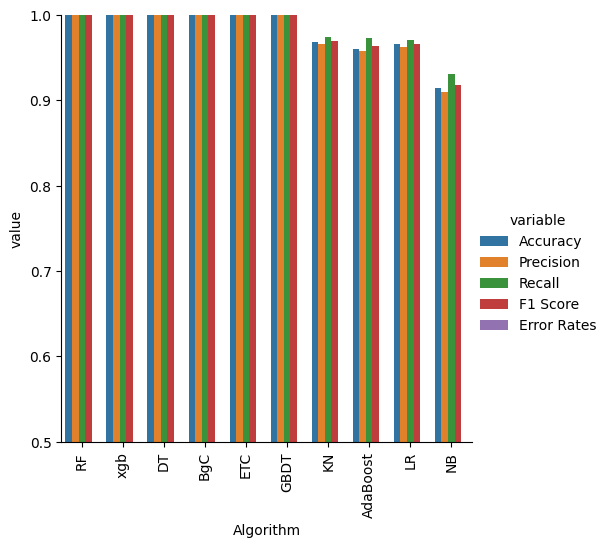

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

##### The DataFrame has columns for the algorithm names, accuracy scores, and precision scores, recall, f1 score and it's sorted based on precision in descending order. This is a good approach to visually compare the performance of different classifiers. Used the pd.melt function to reshape the performance_df DataFrame, creating a new DataFrame named performance_df1 by melting the original DataFrame. Melting is a process of transforming or reshaping data, typically converting wide-format data to long-format.

#### This plot provides a visual comparison of accuracy and precision scores for each algorithm and more, helping identify which algorithms perform better in terms of these metrics on your specific testing data. The x-axis represents the algorithms, the y-axis represents the scores, and different colors represent the metrics variables.

### `Ali AI Prompts Three and Four`

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Models that gave 100% accuracy (already initialized)
models = {
    'Decision Tree': dtc,
    'Random Forest': rfc,
    'XGBoost': xgb,
    'Bagging Classifier': gbdt
}

# Define scorers for accuracy, precision, recall, and F1 score
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='macro'),
    'Recall': make_scorer(recall_score, average='macro'),
    'F1 Score': make_scorer(f1_score, average='macro')
}

# Perform 5-fold cross-validation for each model and each metric
for name, model in models.items():
    print(f"\nValidating {name}...\n" + "-" * 50)
    for metric_name, scorer in scorers.items():
        try:
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
            print(f"{metric_name} - Cross-Validation Scores: {scores}")
            print(f"{metric_name} - Mean CV Score: {np.mean(scores):.4f}")
        except Exception as e:
            print(f"Error with {metric_name}: {e}")
    print("-" * 50)



Validating Decision Tree...
--------------------------------------------------
Accuracy - Cross-Validation Scores: [1. 1. 1. 1. 1.]
Accuracy - Mean CV Score: 1.0000
Precision - Cross-Validation Scores: [1. 1. 1. 1. 1.]
Precision - Mean CV Score: 1.0000
Recall - Cross-Validation Scores: [1. 1. 1. 1. 1.]
Recall - Mean CV Score: 1.0000
F1 Score - Cross-Validation Scores: [1. 1. 1. 1. 1.]
F1 Score - Mean CV Score: 1.0000
--------------------------------------------------

Validating Random Forest...
--------------------------------------------------
Accuracy - Cross-Validation Scores: [0.99996275 1.         1.         1.         1.        ]
Accuracy - Mean CV Score: 1.0000
Precision - Cross-Validation Scores: [0.9999746 1.        1.        1.        1.       ]
Precision - Mean CV Score: 1.0000
Recall - Cross-Validation Scores: [0.99995516 1.         1.         1.         1.        ]
Recall - Mean CV Score: 1.0000
F1 Score - Cross-Validation Scores: [0.99996488 1.         1.         1.    

##### We perform 5-fold cross-validation on multiple models (Decision Tree, Random Forest, XGBoost, and Bagging Classifier) using accuracy, precision, recall, and F1 score as evaluation metrics, calculating the mean of each metric across the folds. The results show near-perfect scores (all close to 1.0), indicating that the models are generalizing well and not overfitting, as there is no significant difference between training and validation performance.

# 6.) Model Improvement

### a.) Voting Classier

##### is an ensemble learning method that combines the predictions of multiple base classifiers to improve the overall performance and predictive accuracy. The idea is to leverage the strengths of different classifiers and produce a more robust and accurate prediction by taking a vote or averaging their outputs.

### i.) Soft Voting

#### 1.)Training Soft Voting

In [ ]:
# Voting Classifier
knc = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
voting = VotingClassifier(estimators=[('KN', knc), ('AdaBoost', abc), ('LR', lrc)],voting='soft')
voting.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('KN', KNeighborsClassifier(n_neighbors=3)),
                             ('AdaBoost', AdaBoostClassifier(random_state=2)),
                             ('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))],
                 voting='soft')

#### The VotingClassifier is configured with voting='soft', this will lead to more nuanced decisions, especially when the individual classifiers provide probability estimates.

In [ ]:
y_train_pred = voting.predict(X_train)
confusion = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", confusion)

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='macro')
recall = recall_score(y_train, y_train_pred, average='macro')
f1 = f1_score(y_train, y_train_pred, average='macro')
error_rate = np.sum(y_train_pred != y_train) / len(y_train)

    # Print metrics
print("Training Accuracy:", accuracy)
print("Training Precision:", precision)
print("Training Recall:", recall)
print("Training F1 Score:", f1)
print("Error Rate:", error_rate)

Confusion Matrix:
 [[64878   394   340]
 [  102 36999    68]
 [    0     0 31443]]
Training Accuracy: 0.9932649898676839
Training Precision: 0.991694636619669
Training Recall: 0.9947464393717134
Training F1 Score: 0.9931960331109058
Error Rate: 0.006735010132316128


### 2.) Soft Voting Testing

In [ ]:
y_pred = voting.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, average='macro'))
print("Recall",recall_score(y_test, y_pred, average='macro'))
print("F1 Score",f1_score(y_test, y_pred, average='macro'))
error_rate = np.sum(y_pred != y_test) / len(y_test)
print("Error Rate:", error_rate)

Confusion Matrix:
 [[16031   253   127]
 [   62  9244    27]
 [    0     0  7813]]
Accuracy 0.9860237804332926
Precision 0.9833925555142559
Recall 0.9891029147869776
F1 Score 0.9861599927183944
Error Rate: 0.013976219566707393


##### The Soft Voting Classifier, which combines K-Nearest Neighbors (KNN), AdaBoost, and Logistic Regression, achieves an accuracy of 98.60%, with high precision (98.34%), recall (98.91%), and F1 score (98.62%), indicating strong performance. The error rate of 1.40% further confirms that the model is performing well on the test data, with minimal misclassifications.

### ii.) Hard voting
it indicate that the hard voting classifier, which makes decisions based on the majority vote without considering probability estimates, performs well on the testing data.

In [ ]:
# Voting Classifier
knc = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
voting_hard = VotingClassifier(estimators=[('KN', knc), ('AdaBoost', abc), ('LR', lrc)],voting='hard')
voting_hard.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('KN', KNeighborsClassifier(n_neighbors=3)),
                             ('AdaBoost', AdaBoostClassifier(random_state=2)),
                             ('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))])

### 1.) Training

In [ ]:
y_train_pred = voting_hard.predict(X_train)


confusion = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", confusion)


# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='macro')
recall = recall_score(y_train, y_train_pred, average='macro')
f1 = f1_score(y_train, y_train_pred, average='macro')
error_rate = np.sum(y_train_pred != y_train) / len(y_train)

    # Print metrics
print("Training Accuracy:", accuracy)
print("Training Precision:", precision)
print("Training Recall:", recall)
print("Training F1 Score:", f1)
print("Error Rate:", error_rate)

Confusion Matrix:
 [[64429   834   349]
 [  138 36968    63]
 [    0     0 31443]]
Training Accuracy: 0.9896888782930028
Training Precision: 0.9876222517094911
Training Recall: 0.9921873431263256
Training F1 Score: 0.9898460671521424
Error Rate: 0.010311121706997259


### 2.) Testing

In [ ]:
y_pred = voting_hard.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, average='macro'))
print("Recall",recall_score(y_test, y_pred, average='macro'))
print("F1 Score",f1_score(y_test, y_pred, average='macro'))
error_rate = np.sum(y_pred != y_test) / len(y_test)
print("Error Rate:", error_rate)

Confusion Matrix:
 [[15948   335   128]
 [   71  9240    22]
 [    0     0  7813]]
Accuracy 0.9834311768036476
Precision 0.980581232141195
Recall 0.9872741914324791
F1 Score 0.9837965767129871
Error Rate: 0.016568823196352476


##### The Hard Voting Classifier, which combines K-Nearest Neighbors (KNN), AdaBoost, and Logistic Regression, achieves an accuracy of 98.34%, with precision (98.06%), recall (98.73%), and F1 score (98.38%), indicating strong performance. The error rate of 1.66% confirms that the model is performing well on the test data, with minimal misclassifications.

#### In this case, **the Soft Voting Classifier** is slightly better than the Hard Voting Classifier. 

- **Soft Voting** achieves an accuracy of 98.60%, which is higher than Hard Voting's accuracy of 98.34%. 
- Additionally, Soft Voting has slightly better precision (98.34% vs. 98.06%), recall (98.91% vs. 98.73%), and F1 score (98.62% vs. 98.38%).

These differences suggest that Soft Voting, by averaging the predicted probabilities, may be more effective in capturing the nuanced patterns in the data.

### b.) Stacking
it takes the idea a step further by introducing a meta-model (final_estimator) that learns to make predictions based on the outputs of the base classifiers.


### 1.) Stacking Training

In [ ]:
# Applying stacking
knc = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
estimators=[('KN', knc), ('AdaBoost', abc), ('LR', lrc)]
final_estimator=RandomForestClassifier()

stacks = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacks.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)

confusion = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", confusion)

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='macro')
recall = recall_score(y_train, y_train_pred, average='macro')
f1 = f1_score(y_train, y_train_pred, average='macro')
error_rate = np.sum(y_train_pred != y_train) / len(y_train)

    # Print metrics
print("Training Accuracy:", accuracy)
print("Training Precision:", precision)
print("Training Recall:", recall)
print("Training F1 Score:", f1)
print("Error Rate:", error_rate)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: Th

Confusion Matrix:
 [[65612     0     0]
 [    0 37169     0]
 [    0     0 31443]]
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Error Rate: 0.0


### 2.) Stacking Testing

In [ ]:
y_pred = stacks.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, average='macro'))
print("Recall",recall_score(y_test, y_pred, average='macro'))
print("F1 Score",f1_score(y_test, y_pred, average='macro'))
error_rate = np.sum(y_pred != y_test) / len(y_test)
print("Error Rate:", error_rate)

Confusion Matrix:
 [[16411     0     0]
 [    1  9332     0]
 [    0     0  7813]]
Accuracy 0.99997019995828
Precision 0.9999796896579739
Recall 0.9999642844387299
F1 Score 0.9999719857822077
Error Rate: 2.9800041720058407e-05


##### The Stacking Classifier outperforms both voting models with an accuracy of 99.997%, precision of 99.998%, recall of 99.996%, and an F1 score of 99.997%, indicating exceptional performance with a very low error rate.

## 8.) Evaluation metrics in the context of binary classification problem


#### ROC (Receiver Operating Characteristic) curves and Precision-Recall curves 
These curves provide valuable insights into the performance of a classification model beyond traditional metrics like accuracy, precision, recall, and F1 score.

### a.) ROC (Receiver Operating Characteristic)

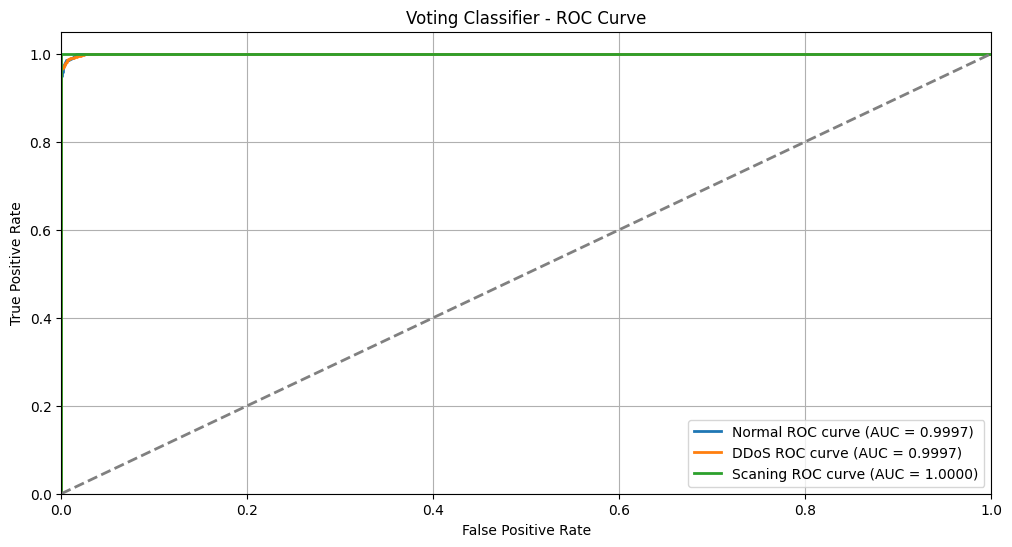

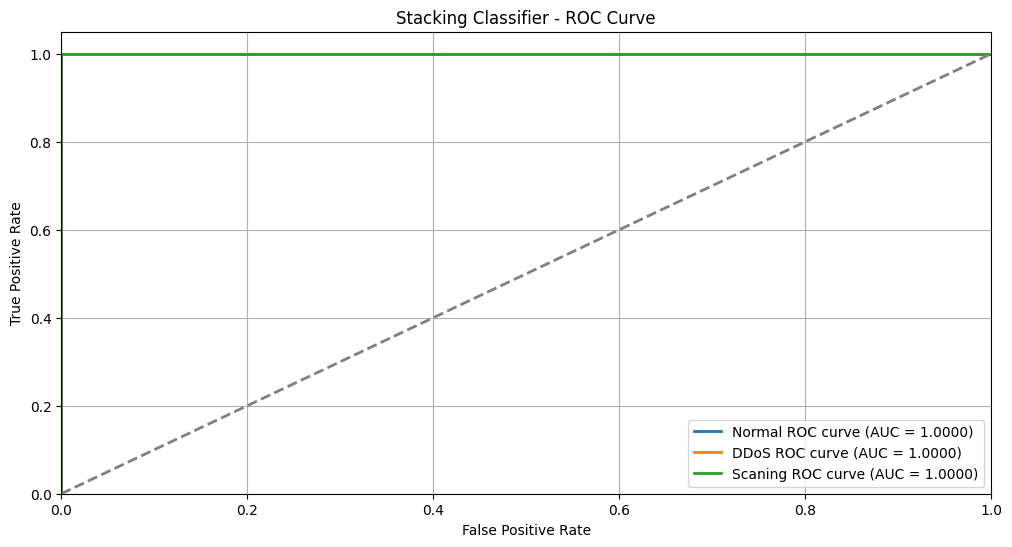

In [ ]:

# Class mapping
class_mapping = {
    0: 'Normal',
    1: 'DDoS',
    2: 'Scaning',
}
class_names = [class_mapping[i] for i in range(len(class_mapping))]

# Number of classes
n_classes = len(class_mapping)

# y_test contains true labels and there are 3 classes
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Get predicted probabilities for Voting and Stacking classifiers
y_pred_probs_voting = voting.predict_proba(X_test)
y_pred_probs_stacking = stacks.predict_proba(X_test)

# Initialize dictionaries for ROC data
fpr_voting, tpr_voting, roc_auc_voting = dict(), dict(), dict()
fpr_stacking, tpr_stacking, roc_auc_stacking = dict(), dict(), dict()

# Compute ROC curve and AUC for each class for Voting Classifier
for i in range(n_classes):
    fpr_voting[i], tpr_voting[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs_voting[:, i])
    roc_auc_voting[i] = auc(fpr_voting[i], tpr_voting[i])

# Compute ROC curve and AUC for each class for Stacking Classifier
for i in range(n_classes):
    fpr_stacking[i], tpr_stacking[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs_stacking[:, i])
    roc_auc_stacking[i] = auc(fpr_stacking[i], tpr_stacking[i])

# Plot ROC Curves for Voting Classifier
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr_voting[i], tpr_voting[i], lw=2, label=f'{class_names[i]} ROC curve (AUC = {roc_auc_voting[i]:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Classifier - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot ROC Curves for Stacking Classifier
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr_stacking[i], tpr_stacking[i], lw=2, label=f'{class_names[i]} ROC curve (AUC = {roc_auc_stacking[i]:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stacking Classifier - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##### The ROC curves help visualize the performance of these classifiers in terms of their true positive rate (TPR) against the false positive rate (FPR) across different decision thresholds.

Both classifiers exhibit outstanding ROC curve characteristics, and the small difference in AUC values may not be significant. These results suggest that both the Voting Classifier and the Stacking Classifier are effective in making predictions and distinguishing between classes.

### b.) Precision-Recall curves

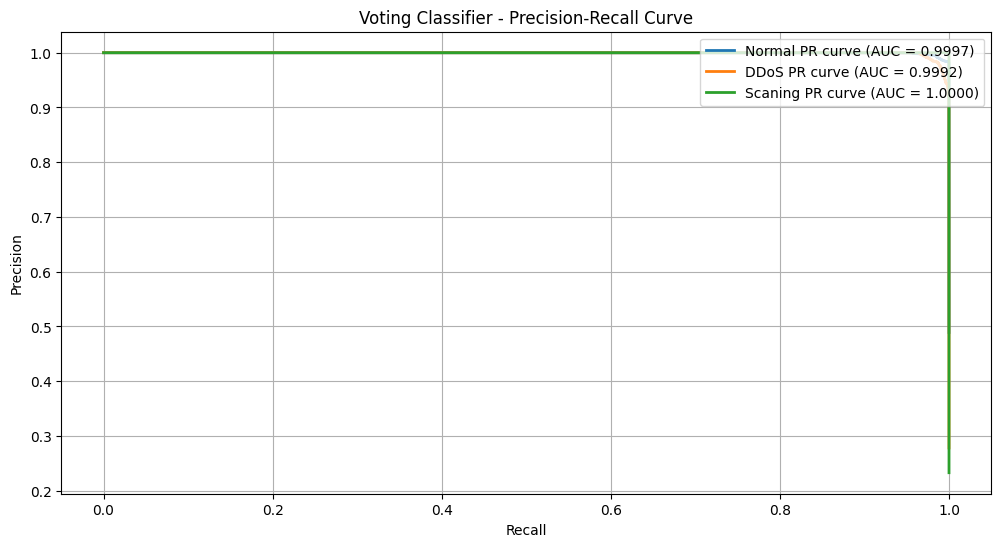

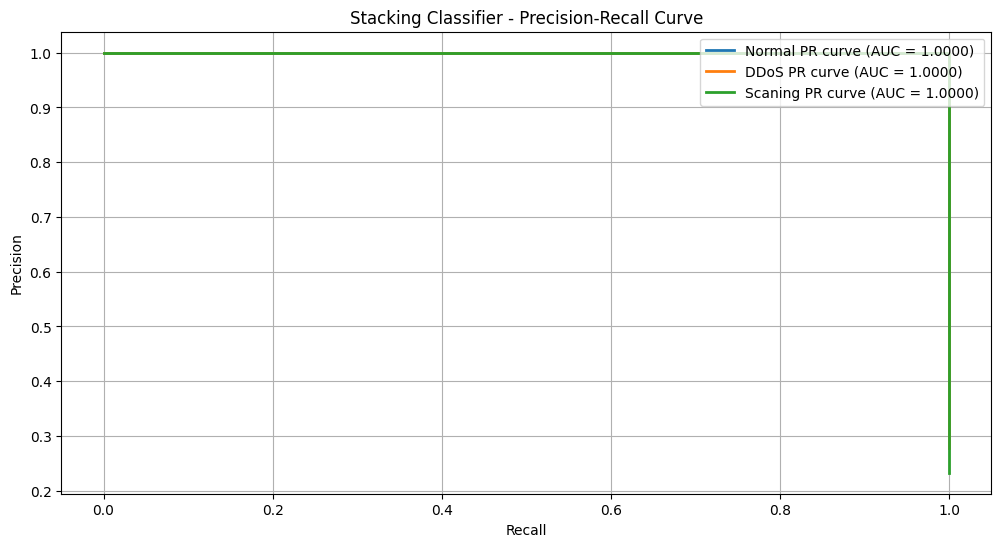

In [ ]:


# Initialize dictionaries for Precision-Recall data
precision_voting, recall_voting, pr_auc_voting = dict(), dict(), dict()
precision_stacking, recall_stacking, pr_auc_stacking = dict(), dict(), dict()

# Compute Precision-Recall curve and AUC for each class for Voting Classifier
for i in range(n_classes):
    precision_voting[i], recall_voting[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_probs_voting[:, i])
    pr_auc_voting[i] = auc(recall_voting[i], precision_voting[i])

# Compute Precision-Recall curve and AUC for each class for Stacking Classifier
for i in range(n_classes):
    precision_stacking[i], recall_stacking[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_probs_stacking[:, i])
    pr_auc_stacking[i] = auc(recall_stacking[i], precision_stacking[i])

# Plot Precision-Recall Curves for Voting Classifier
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(recall_voting[i], precision_voting[i], lw=2, label=f'{class_names[i]} PR curve (AUC = {pr_auc_voting[i]:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Voting Classifier - Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Plot Precision-Recall Curves for Stacking Classifier
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(recall_stacking[i], precision_stacking[i], lw=2, label=f'{class_names[i]} PR curve (AUC = {pr_auc_stacking[i]:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Stacking Classifier - Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


#### The Precision-Recall curve results show that the Stacking Classifier performs better than Voting, achieving a perfect score (1.0) for both normal and DDoS classes, while Voting Classifier has a slightly lower precision (0.97) for these classes but still maintains a high overall performance.

##### For each class, this means that the Stacking Classifier is consistently performing better across all categories (normal, DDoS, and scannig), with perfect precision and recall (1.0) for each class. This indicates that the model is correctly classifying every instance in each category, without any false positives or false negatives. On the other hand, the Voting Classifier achieves a slightly lower precision (0.97) for both the normal and DDoS classes, meaning it misses a few true positives or incorrectly labels some instances, although its performance is still high overall.

In [103]:
# Save the trained model to a file
joblib.dump(voting, 'soft_model.pkl')
print("Soft Voting model saved successfully.")

# Save the trained model to a file
joblib.dump(voting_hard, 'hard_model.pkl')
print("Hard Voting Model saved successfully.")

# Save the trained model to a file
joblib.dump(stacks, 'Stacking_model.pkl')
print("Stacking Model saved successfully.")

Soft Voting model saved successfully.
Hard Voting Model saved successfully.
Stacking Model saved successfully.


#### Saving trained models using the joblib